In [2]:
pip install nibabel

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os, glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [56]:
dataInputPath = 'D:/SEM 7/Mini Project/Dataset/KaggleDataset/'
imagePathInput = os.path.join(dataInputPath, 'Image/')
maskPathInput = os.path.join(dataInputPath, 'GroundTruth/')

dataOutputPath = 'D:/SEM 7/Mini Project/Dataset/Slices/'
imageSliceOutput = os.path.join(dataOutputPath, 'Image/')
maskSliceOutput = os.path.join(dataOutputPath, 'GroundTruth/')

HOUNSFIELD_MIN = -1000
HOUNSFIELD_MAX = 2000
HOUNSFIELD_RANGE = HOUNSFIELD_MAX - HOUNSFIELD_MIN

SLICE_X = False
SLICE_Y = False
SLICE_Z = True

SLICE_DECIMATE_IDENTIFIER = 3

In [5]:
imgPath = os.path.join(imagePathInput, 'Case1.nii')
img = nib.load(imgPath).get_fdata()
np.min(img), np.max(img), img.shape, type(img)

(0.0, 2238.553825378418, (880, 880, 12), numpy.ndarray)

In [23]:
maskPath = os.path.join(maskPathInput, 'mask_case1.nii')
mask = nib.load(maskPath).get_fdata()
np.min(mask), np.max(mask), mask.shape, type(mask)

(0.0, 18.0, (880, 880, 12), numpy.memmap)

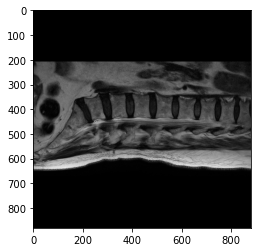

In [24]:
imgSlice = img[:,:,7]
plt.imshow(imgSlice, cmap='gray')
plt.show()

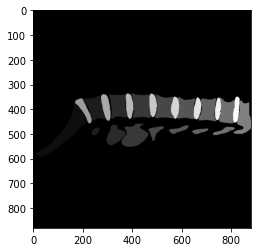

In [25]:
imgSlice = mask[:,:,7]
plt.imshow(imgSlice, cmap='gray')
plt.show()

In [30]:
def normalizeImageIntensityRange(img):
    img[img < HOUNSFIELD_MIN] = HOUNSFIELD_MIN
    img[img > HOUNSFIELD_MAX] = HOUNSFIELD_MAX
    return (img - HOUNSFIELD_MIN) / HOUNSFIELD_RANGE

nImg = normalizeImageIntensityRange(img)
np.min(nImg), np.max(nImg), nImg.shape, type(nImg)

(0.3333333333333333, 1.0, (880, 880, 12), numpy.ndarray)

In [35]:
def readImageVolume(imgPath, normalize=False):
    img = nib.load(imgPath).get_fdata()
    if normalize:
        return normalizeImageIntensityRange(img)
    else:
        return img
    
readImageVolume(imgPath, normalize=True)
readImageVolume(maskPath, normalize=False)

memmap([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [39]:
def saveSlice(img, fname, path):
    img = np.uint8(img * 255)
    fout = os.path.join(path, f'{fname}.png')
    cv2.imwrite(fout, img)
    print(f'[+] Slice saved: {fout}', end='\r')
    
saveSlice(nImg[:,:,7], 'test', imageSliceOutput)
saveSlice(mask[:,:,7], 'test', maskSliceOutput)

In [53]:
def sliceAndSaveVolumeImage(vol, fname, path):
    (dimx, dimy, dimz) = vol.shape
    #print('image vol shape : '+vol.shape)
    print(dimx, dimy, dimz)
    cnt = 0
    #print(SLICE_X)
    #print(SLICE_Y)
    #print(SLICE_Z)
    #if SLICE_X:
        #print(SLICE_X)
        #cnt += dimx
        #print('Slicing X: ')
        #for i in range(dimx):
         #   saveSlice(vol[i,:,:], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_x', path)
            
    #if SLICE_Y:
     #   cnt += dimy
      #  print('Slicing Y: ')
       # for i in range(dimy):
        #    saveSlice(vol[:,i,:], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_y', path)
            
    if SLICE_Z:
        cnt += dimz
        print('Slicing Z: ')
        for i in range(dimz):
            saveSlice(vol[:,:,i], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_z', path)
    return cnt

In [58]:
for index, filename in enumerate(sorted(glob.iglob(imagePathInput+'*.nii'))):
    img = readImageVolume(filename, True)
    print('line 1: '+filename, img.shape, np.sum(img.shape), np.min(img), np.max(img))
    #print('line 2: '+img)
    numOfSlices = sliceAndSaveVolumeImage(img, 'Spine'+str(index), imageSliceOutput)
    print(f'\n{filename}, {numOfSlices} slices created \n')

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case1.nii (880, 880, 12) 1772 0.3333333333333333 1.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine0-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case1.nii, 12 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case10.nii (960, 960, 15) 1935 0.3333333333333333 1.0
960 960 15
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine1-slice014_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case10.nii, 15 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case100.nii (880, 880, 12) 1772 0.3333333333333333 1.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine2-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case100.nii, 12 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case122.nii (880, 880, 12) 1772 0.3333333333333333 1.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine26-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case122.nii, 12 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case123.nii (880, 880, 12) 1772 0.3333333333333333 1.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine27-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case123.nii, 12 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case124.nii (880, 880, 15) 1775 0.3333333333333333 1.0
880 880 15
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine28-slice014_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case124.nii, 15 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/Kaggl

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case146.nii (880, 880, 12) 1772 0.3333333333333333 1.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine52-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case146.nii, 12 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case147.nii (880, 880, 15) 1775 0.3333333333333333 1.0
880 880 15
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine53-slice014_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case147.nii, 15 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case148.nii (880, 880, 15) 1775 0.3333333333333333 1.0
880 880 15
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine54-slice014_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case148.nii, 15 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/Kaggl

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case17.nii (880, 880, 12) 1772 0.3333333333333333 1.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine78-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case17.nii, 12 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case170.nii (880, 880, 12) 1772 0.3333333333333333 1.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine79-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case170.nii, 12 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case171.nii (880, 880, 12) 1772 0.3333333333333333 1.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine80-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case171.nii, 12 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/KaggleD

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case193.nii (880, 880, 12) 1772 0.3333333333333333 1.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine104-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case193.nii, 12 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case194.nii (880, 880, 12) 1772 0.3333333333333333 1.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine105-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case194.nii, 12 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case195.nii (880, 880, 12) 1772 0.3333333333333333 1.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine106-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case195.nii, 12 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/Ka

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case36.nii (1008, 1008, 12) 2028 0.3333333333333333 1.0
1008 1008 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine130-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case36.nii, 12 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case37.nii (880, 880, 12) 1772 0.3333333333333333 1.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine131-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case37.nii, 12 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case38.nii (880, 880, 12) 1772 0.3333333333333333 1.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine132-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case38.nii, 12 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/Kagg

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case6.nii (880, 880, 12) 1772 0.3333333333333333 1.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine156-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case6.nii, 12 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case60.nii (880, 880, 12) 1772 0.3333333333333333 1.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine157-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case60.nii, 12 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case61.nii (880, 880, 15) 1775 0.3333333333333333 1.0
880 880 15
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine158-slice014_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case61.nii, 15 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/KaggleData

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case83.nii (880, 880, 12) 1772 0.3333333333333333 1.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine182-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case83.nii, 12 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case84.nii (880, 880, 12) 1772 0.3333333333333333 1.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine183-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case84.nii, 12 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case85.nii (880, 880, 12) 1772 0.3333333333333333 1.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/Image/Spine184-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/Image\Case85.nii, 12 slices created 

line 1: D:/SEM 7/Mini Project/Dataset/KaggleDa

In [59]:
for index, filename in enumerate(sorted(glob.iglob(maskPathInput+'*.nii'))):
    img = readImageVolume(filename, False)
    print(filename, img.shape, np.sum(img.shape), np.min(img), np.max(img))
    numOfSlices = sliceAndSaveVolumeImage(img, 'Mask_Spine'+str(index), maskSliceOutput)
    print(f'\n{filename}, {numOfSlices} slices created \n')

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case1.nii (880, 880, 12) 1772 0.0 18.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine0-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case1.nii, 12 slices created 

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case10.nii (960, 960, 15) 1935 0.0 18.0
960 960 15
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine1-slice014_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case10.nii, 15 slices created 

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case100.nii (880, 880, 12) 1772 0.0 17.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine2-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case100.nii, 12 slices created 

D:/SEM 7/Mini Proje

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case121.nii (880, 880, 12) 1772 0.0 17.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine25-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case121.nii, 12 slices created 

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case122.nii (880, 880, 12) 1772 0.0 17.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine26-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case122.nii, 12 slices created 

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case123.nii (880, 880, 12) 1772 0.0 18.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine27-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case123.nii, 12 slices created 

D:/SEM 7/M

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case144.nii (880, 880, 12) 1772 0.0 17.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine50-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case144.nii, 12 slices created 

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case145.nii (880, 880, 15) 1775 0.0 17.0
880 880 15
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine51-slice014_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case145.nii, 15 slices created 

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case146.nii (880, 880, 12) 1772 0.0 17.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine52-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case146.nii, 12 slices created 

D:/SEM 7/M

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case167.nii (880, 880, 12) 1772 0.0 17.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine75-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case167.nii, 12 slices created 

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case168.nii (880, 880, 15) 1775 0.0 18.0
880 880 15
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine76-slice014_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case168.nii, 15 slices created 

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case169.nii (880, 880, 12) 1772 0.0 17.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine77-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case169.nii, 12 slices created 

D:/SEM 7/M

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case19.nii (880, 880, 15) 1775 0.0 17.0
880 880 15
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine100-slice014_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case19.nii, 15 slices created 

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case190.nii (880, 880, 15) 1775 0.0 17.0
880 880 15
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine101-slice014_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case190.nii, 15 slices created 

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case191.nii (880, 880, 12) 1772 0.0 17.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine102-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case191.nii, 12 slices created 

D:/SEM 7/

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case31.nii (880, 880, 12) 1772 0.0 17.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine125-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case31.nii, 12 slices created 

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case32.nii (512, 512, 12) 1036 0.0 17.0
512 512 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine126-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case32.nii, 12 slices created 

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case33.nii (880, 880, 12) 1772 0.0 18.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine127-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case33.nii, 12 slices created 

D:/SEM 7/Mini

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case54.nii (880, 880, 12) 1772 0.0 18.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine150-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case54.nii, 12 slices created 

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case55.nii (880, 880, 15) 1775 0.0 17.0
880 880 15
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine151-slice014_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case55.nii, 15 slices created 

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case56.nii (880, 880, 12) 1772 0.0 17.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine152-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case56.nii, 12 slices created 

D:/SEM 7/Mini

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case77.nii (880, 880, 12) 1772 0.0 18.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine175-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case77.nii, 12 slices created 

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case78.nii (880, 880, 12) 1772 0.0 17.0
880 880 12
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine176-slice011_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case78.nii, 12 slices created 

D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case79.nii (880, 880, 15) 1775 0.0 16.0
880 880 15
False
False
True
Slicing Z: 
[+] Slice saved: D:/SEM 7/Mini Project/Dataset/Slices/GroundTruth/Mask_Spine177-slice014_z.png
D:/SEM 7/Mini Project/Dataset/KaggleDataset/GroundTruth\mask_case79.nii, 15 slices created 

D:/SEM 7/Mini